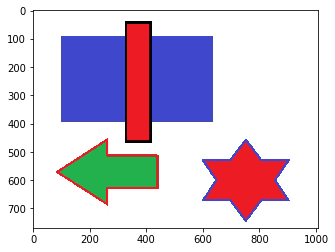

In [36]:
import cv2,numpy as np
from matplotlib import pyplot as plt
 
%matplotlib inline
image=cv2.imread("lab2-task2-image.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

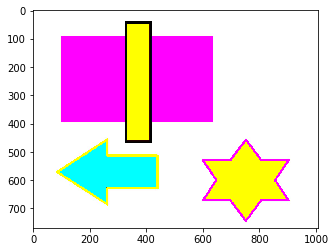

In [37]:
image[(image[:,:,0]>=120)*(image[:,:,1]<120)]=[255,0,255]
image[(image[:,:,1]>=120)*(image[:,:,0]<120)]=[255,255,0]

image[(image[:,:,2]>=120)*(image[:,:,0]<120)]=[0,255,255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

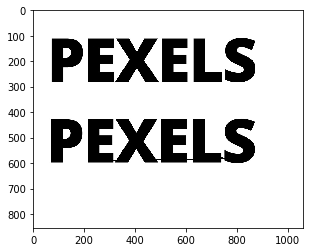

In [42]:
#Lab Task 1


image=cv2.imread("lab2_task1_2.jpg") 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
 
labels={}


In [53]:
def get_value(key,verbose):
    global labels

    if(labels[key]==key):

        return key
    else:
        return get_value(labels[key],verbose)

def assign(big,small,verbose):
     
    global labels
    new1=get_value(big,verbose)
    new2=get_value(small,verbose)
     
    if(new1>=new2):
        labels[new1]=new2
    else:
        labels[new2]=new1
 
 
        



def first_pass(image):
    image[image<128]=0
    image[image>=128]=255
    global labels
    copy=np.zeros_like(image,dtype=int)
    rows,cols= image.shape
    count=0


    value=1 
    print image.shape

    for i in range(rows):
        for j in range(cols): 

            if(image[i,j]==255):
                pass


                if(i-1 <0 and j-1<0):
                    
                    labels[value]=value
                    copy[value]=value
                    value+=1



                elif(i-1<0):
                     

                    if(copy[i,j-1]!=0):
                        copy[i,j]=copy[i,j-1]

                    else:
                        copy[i,j]=value
                        labels[value]=value
                        value+=1


                elif(j-1<0):
                      
                    if(copy[i-1,j]!=0):
                        copy[i,j]=copy[i-1,j]
                    else:
                        copy[i,j]=value
                        value+=1
                        labels[value]=value

            else:
                verbose=False

                low,high=-2,-2
                row,col=copy[i-1,j],copy[i,j-1]
                if(row!=0 or col!=0):
                    if(row!=0 and col!=0):

                        if(row==col): 
                            copy[i,j]=row

                        else:

                            if(row<col):
                                low=row
                                high=col
                            else:
                                low=col
                                high=row 
                            count+=1


                            assign(high,low,verbose)
                            copy[i,j]=low


                    elif(row==0 and col!=0):
                         copy[i,j]=col

                    else:
                        copy[i,j]=row


                else:

                    copy[i,j]=value
                    labels[value]=value
                    value+=1
    return copy

def get_segments(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i,j]==0):
                continue
            image[i,j]=get_value(image[i,j],False)
    return image


def get_color_segments(image):
     
    x,y=image.shape
    shape=x,y,3
    unique=np.unique(image)
    new=np.zeros(shape)
    for i in unique:
        if(i==0):
            continue
        a=np.zeros_like(new)
        color=np.random.randint(20,190,3)
        new[np.where(image==i)]=color
        a[np.where(image==i)]=color
        
        name=str(i)+".jpg"
        cv2.imwrite(name,a)
    
     

    return new
     


def connected_components(image):
    image=first_pass(image)
    image=get_segments(image)
    image=get_color_segments(image)
    return image

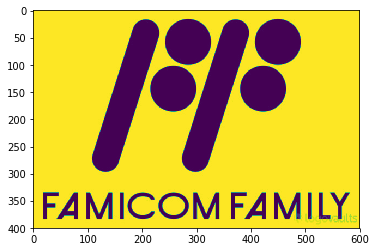

(400, 600)
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer
omer

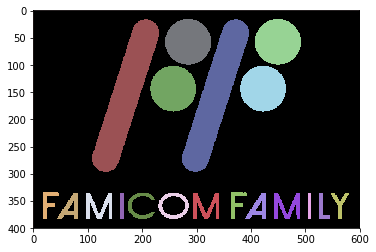

In [54]:
original_image=cv2.imread("lab2_task1_1.jpg",0)
plt.imshow(original_image)
plt.show()
im=connected_components(original_image)
print ' Image After conversion using connected components \n\n' 
plt.imshow(im)